In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, pearsonr
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import re

#constant string value
SEPERATOR = "\n___________________________"

## Part 1: Intro to OOP

In [34]:
from abc import ABC, abstractmethod

# Base class for all neurons
class GeneralNeuron:
    def __init__(self, firing_rate=0.0):
        self.firing_rate = firing_rate

    # Using an abstract method to force the derived classes to implement their own activation
    @abstractmethod
    def activate(self, stimulus_strength):
        # Generic activation based on stimulus strength
        self.firing_rate = stimulus_strength * 0.1
        return f"Firing rate set to {self.firing_rate} Hz"

# Sensory neuron base class
class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate=0.0, receptor_type=""):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

    @abstractmethod
    # Using an abstract method to force the derived classes to implement their own activation
    def sense_stimulus(self, stimulus):
        return f"Sensing {self.receptor_type} stimulus: {stimulus}"

# Motor neuron base class
class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate=0.0, target_muscle=""):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    @abstractmethod
    # Using an abstract method to force the derived classes to implement their own activation
    def control_muscle(self):
        return f"Controlling {self.target_muscle} with firing rate {self.firing_rate} Hz"

# Specific sensory neuron: Photoreceptor
class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0.0):
        super().__init__(firing_rate, receptor_type="light")

    def detect_light(self, light_intensity):
        self.firing_rate = light_intensity * 0.2
        return f"Photoreceptor activated: Firing rate {self.firing_rate} Hz"

# Specific sensory neuron: Mechanoreceptor
class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0.0):
        super().__init__(firing_rate, receptor_type="pressure")

    def detect_pressure(self, pressure_level):
        self.firing_rate = pressure_level * 0.3
        return f"Mechanoreceptor activated: Firing rate {self.firing_rate} Hz"

# Specific motor neuron: Alpha Motor Neuron
class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0.0):
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    def skeletal_muscle_control(self):
        return f"Alpha Motor Neuron controlling skeletal muscle: Contraction strength proportional to {self.firing_rate} Hz, and is fast with rapid connections"

# Specific motor neuron: Gamma Motor Neuron
class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0.0):
        super().__init__(firing_rate, target_muscle="muscle spindle")

    def muscle_spindle_control(self):
        return f"Gamma Motor Neuron adjusting muscle tone: Response level proportional to {self.firing_rate} Hz, is slow with slow connections"

## Part 2: Creating and Downsampling a Sine Wave using NumPy

In this section, we will explain the process of creating a sine wave using NumPy and then downsampling it.

### Step 1: Define Parameters

First, we define the parameters for the sine wave:
- `frequency`: The frequency of the sine wave in Hertz.
- `sampling_rate`: The number of samples per second.
- `duration`: The duration of the sine wave in seconds.

### Step 2: Create the Time Array

Using the `numpy.linspace` function, we create a time array that spans from 0 to the duration with the specified sampling rate.

### Step 3: Visualize the Sine Wave

Using `matplotlib`, we can plot the sine waves to visualize it.

### Step 4: Create a Validation

We print and run if statements on the min and max points of the waves to validage the data

In [35]:
# Parameters
frequency = 5
sampling_rate = 1000
duration = 2

# Time array
# endpoint ensures that 1 and -1 are included in the array
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Sine wave
# 2 * pi will make 1 in the linspace equal to 1 in the graph
sinWave = np.sin(2 * np.pi * frequency * time)

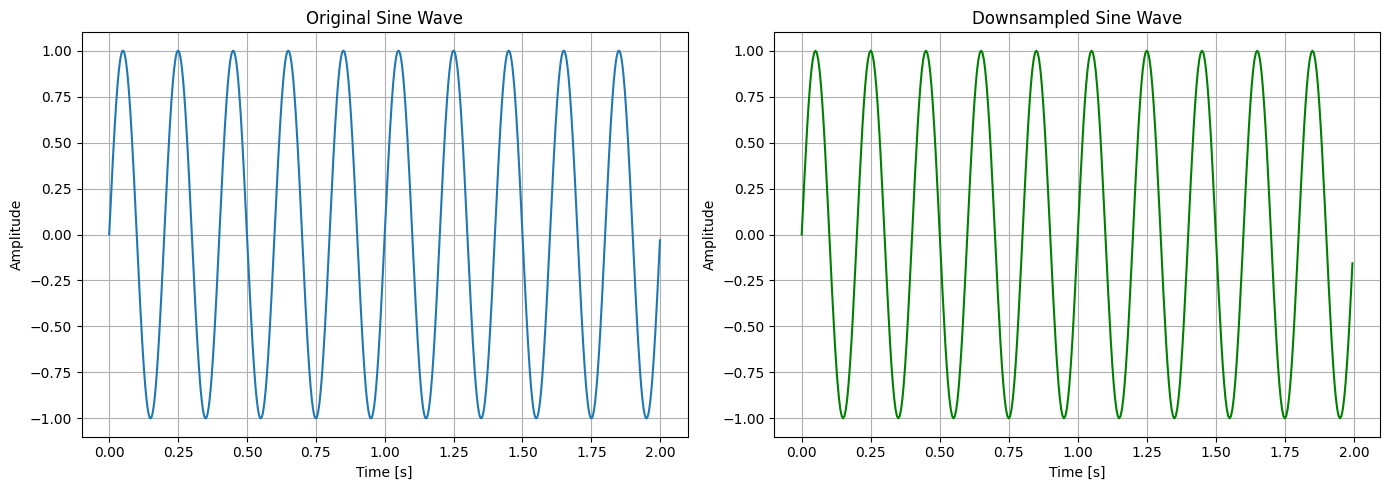

In [36]:
# Downsample the wave to 20 percent
downsample_factor = 5  # Since 20% is 1/5th of the original
timeDown = time[::downsample_factor]
sinWaveDown = sinWave[::downsample_factor]

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Makes table for original sine wave
axs[0].plot(time, sinWave)
axs[0].set_title('Original Sine Wave')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)

# Makes table for new sine wave
axs[1].plot(timeDown, sinWaveDown, color='green')
axs[1].set_title('Downsampled Sine Wave')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Amplitude')
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [37]:
print("original min: ", min(sinWave))
print("downsampled min: ", min(sinWaveDown))
print("original max: ", max(sinWave))
print("downsampled max: ", max(sinWaveDown), SEPERATOR)

if max(sinWaveDown) == max(sinWave) and min(sinWaveDown) == min(sinWave):
    print("Downsampling successful! :)")

original min:  -1.0
downsampled min:  -1.0
original max:  1.0
downsampled max:  1.0 
___________________________
Downsampling successful! :)


## Laptop Price Exploration with Pandas

In this section, we will the use the Pandas library to explore the laptop prices dataset.

We will perform the following actions:
- Most expensive company
- Plotting prices of laptops
- See types of operating systems
- Plot prices per OS
- Analyze correlation between RAM and price
- Add a feature that stores the memory type

In [38]:
# Extracts the data from the csv file
df = pd.read_csv('laptop_price - dataset.csv')
# Gives the dimensions of the data (#rows, #columns)
print(df.shape, SEPERATOR)
# lists the columns of the data
print(df.columns, SEPERATOR)
# Gives a sample of the data
print(df.describe(), SEPERATOR)

(1275, 15) 
___________________________
Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object') 
___________________________
            Inches  CPU_Frequency (GHz)     RAM (GB)  Weight (kg)  \
count  1275.000000          1275.000000  1275.000000  1275.000000   
mean     15.022902             2.302980     8.440784     2.040525   
std       1.429470             0.503846     5.097809     0.669196   
min      10.100000             0.900000     2.000000     0.690000   
25%      14.000000             2.000000     4.000000     1.500000   
50%      15.600000             2.500000     8.000000     2.040000   
75%      15.600000             2.700000     8.000000     2.310000   
max      18.400000             3.600000    64.000000     4.700000   

       Price (Euro)  
count   1275.000000  
mean    1134.96905

In [39]:
print(df.head())

  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD       Intel  Iris Plus Graphics 640  macOS

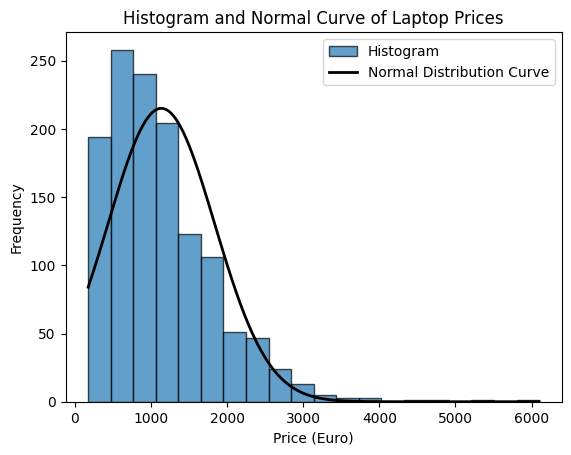

In [40]:
# Example Data
prices = sorted(list(df['Price (Euro)']))
meanPrice = df['Price (Euro)'].mean()
stdPrice = df['Price (Euro)'].std()

# Generate the histogram with original prices
counts, bins, _ = plt.hist(prices, bins=20, density=False, edgecolor='black', alpha=0.7, label='Histogram')

# Generate the curve using actual prices
x = np.linspace(min(prices), max(prices), 1000)  # Price range
y = norm.pdf(x, meanPrice, stdPrice) * (bins[1] - bins[0]) * len(prices)  # Scale the curve to match histogram

# Plot the curve
plt.plot(x, y, color='black', linewidth=2, label='Normal Distribution Curve')

# Titles and labels
plt.title('Histogram and Normal Curve of Laptop Prices')
plt.xlabel('Price (Euro)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

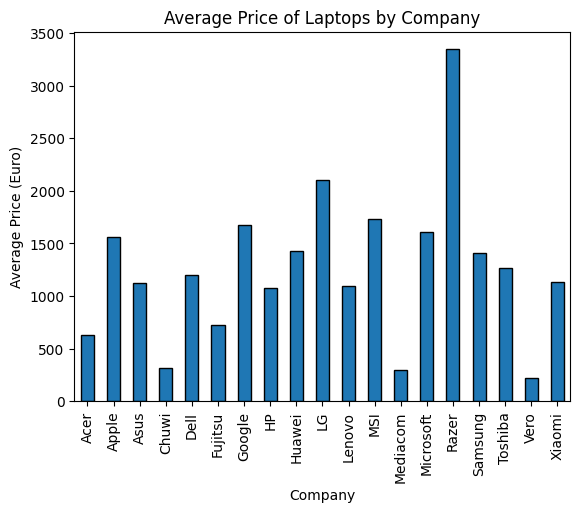

The most expensive company is:  Razer


In [41]:
df.groupby('Company')['Price (Euro)'].mean().plot(kind='bar', edgecolor='black', title='Average Price of Laptops by Company')
plt.ylabel('Average Price (Euro)')
plt.show()
print('The most expensive company is: ', df.groupby('Company')['Price (Euro)'].mean().idxmax())

In [42]:
unique_os_types = df['OpSys'].unique()
print(unique_os_types)
# Makes all windows versions the same
df['OpSys'] = df['OpSys'].apply(lambda x: 'Windows' if 'Windows' in x else x)
# Makes all mac versions the same
df['OpSys'] = df['OpSys'].apply(lambda x: 'Mac OS' if 'MAC' in x.upper() else x)
unique_os_types = df['OpSys'].unique()
print(unique_os_types)

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
['Mac OS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


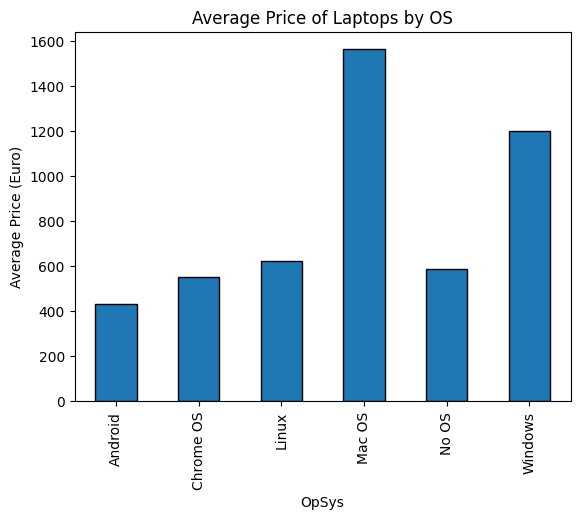

The most expensive OS is:  Mac OS


In [43]:
df.groupby('OpSys')['Price (Euro)'].mean().plot(kind='bar', edgecolor='black', title='Average Price of Laptops by OS')
plt.ylabel('Average Price (Euro)')
plt.show()
print('The most expensive OS is: ', df.groupby('OpSys')['Price (Euro)'].mean().idxmax())

Pearson correlation coefficient (r): 0.7402865271622701
Significance (p-value): 9.132905716145095e-222
This implies an extremely strong and significant positive correlation between RAM and Price 
___________________________


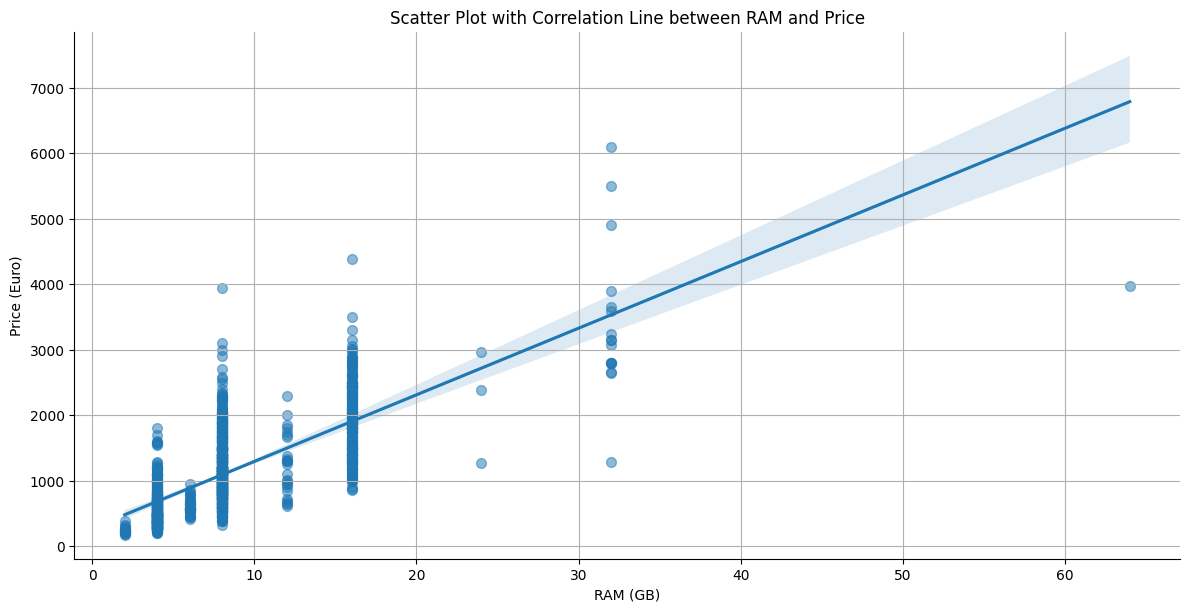

In [44]:
# Calculate the Pearson correlation coefficient and p-value
r_value, p_value = pearsonr(df['RAM (GB)'], df['Price (Euro)'])
print(f"Pearson correlation coefficient (r): {r_value}")
print(f"Significance (p-value): {p_value}")
print('This implies an extremely strong and significant positive correlation between RAM and Price', SEPERATOR)

# Create a scatter plot with a correlation line
sns.lmplot(x='RAM (GB)', y='Price (Euro)', data=df, aspect=2, height=6, scatter_kws={'s': 50, 'alpha': 0.5})
plt.title('Scatter Plot with Correlation Line between RAM and Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.grid(True)
plt.show()

In [45]:
# Define a cleaning function
def clean_storage_type(memory):
    # Remove digits, TB, GB
    cleaned = re.sub(r'[\dTBGB]', '', memory)
    # Replace standalone periods and surrounding spaces
    cleaned = re.sub(r'\s*\.\s*', ' ', cleaned)
    # Remove extra spaces
    cleaned = re.sub(r'\s+', ' ', cleaned)
    # Split on '+' and deduplicate
    types = sorted(set(part.strip() for part in cleaned.split('+')))
    return ' + '.join(types)

df['Storage type'] = df['Memory'].apply(clean_storage_type) # Display the first few rows to verify the new column
df['Storage type'].unique()

array(['SSD', 'Flash Storage', 'HDD', 'HDD + SSD', 'Hybrid',
       'Flash Storage + HDD', 'Hybrid + SSD'], dtype=object)

# Data Insights and Questions

## Questions for Analysis:

### Price Insights:
1. How does each column correlate with price? Which correlates strongest? How does each column correlate to one another?
    - We will make all columns numerical using the label encoder from the sklearn library to do so
    - Then we will use the pandas corr() function to see the correlations between each column
    - After this we can use matplotlib to make a correlation heatmap to vissually see how each column effects one another

2. What is the most effective way to predict the price based on the other features?
    - We will use the same numerical columns from the previous columns
    - We will seperate the data into training and testing sections (setting aside 20 percent for testing)
    - We will test 3 different methods 1. Linear Regression, 2. Random Forest, 3. Gradient Boosting
    - We will compare the r squared score for each type to determine the most effective model
    - For the most effective model we will print the features it used to determine its results

In [114]:
# Create the encoder
label_encoder = LabelEncoder()
enhanced_df = df.copy()
# Makes text columns numerical for easier processing
for column in ['Company', 'Product', 'TypeName', 'CPU_Company', 'CPU_Type','Storage type', 'GPU_Type', 'GPU_Company', 'OpSys', 'Memory', 'ScreenResolution']:
    enhanced_df[column] = label_encoder.fit_transform(df[column])

Price (Euro)           1.000000
RAM (GB)               0.740287
CPU_Type               0.473860
CPU_Frequency (GHz)    0.428847
Storage type           0.356792
GPU_Company            0.324300
ScreenResolution       0.322761
OpSys                  0.220849
Weight (kg)            0.211883
Memory                 0.198114
CPU_Company            0.177881
Product                0.142888
Company                0.136541
Inches                 0.066608
TypeName              -0.125648
GPU_Type              -0.144787
Name: Price (Euro), dtype: float64


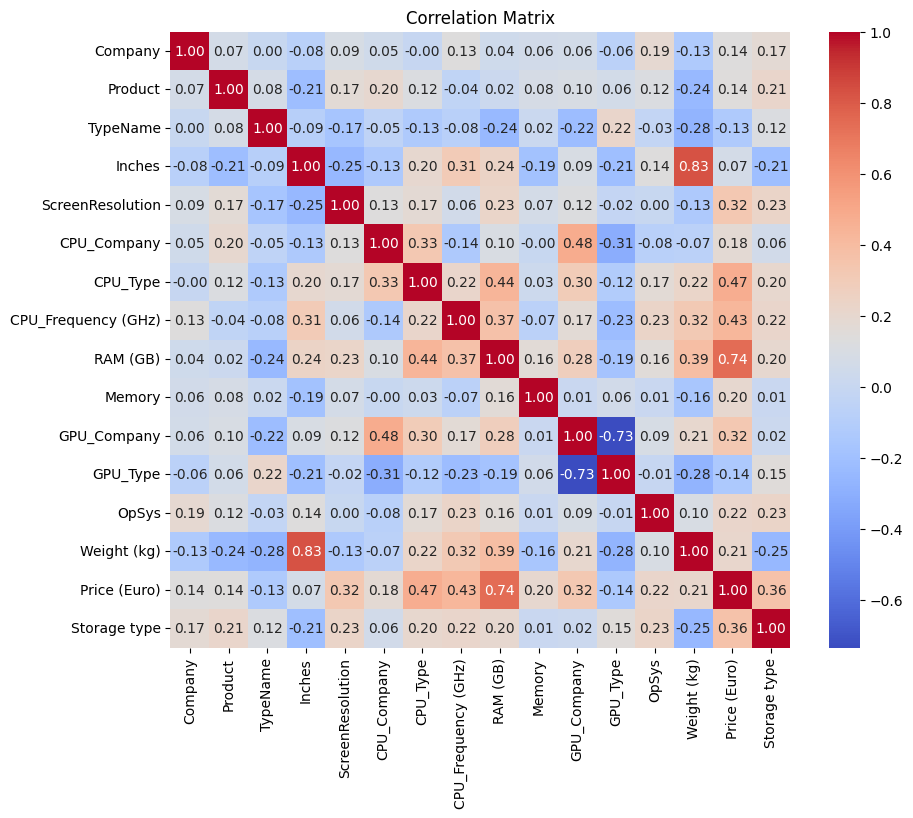

In [115]:
# Select numeric columns
numeric_df = enhanced_df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation values for 'Price' in descending order
print(correlation_matrix['Price (Euro)'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [116]:
# Features (X) and target (y)
X = enhanced_df.drop(columns=['Price (Euro)'])
y = enhanced_df['Price (Euro)']

# Sets some data for training, and a smaller section for testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (1020, 15)
Testing set: (255, 15)


In [120]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2, SEPERATOR)

R² Score: 0.6943144850249462 
___________________________


In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

Mean Absolute Error (MAE): 162.59531381699347
R² Score: 0.8741681016974916


In [121]:
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

R² Score: 0.8835667800022522


# We can see the most effective model is the Gradient Boost

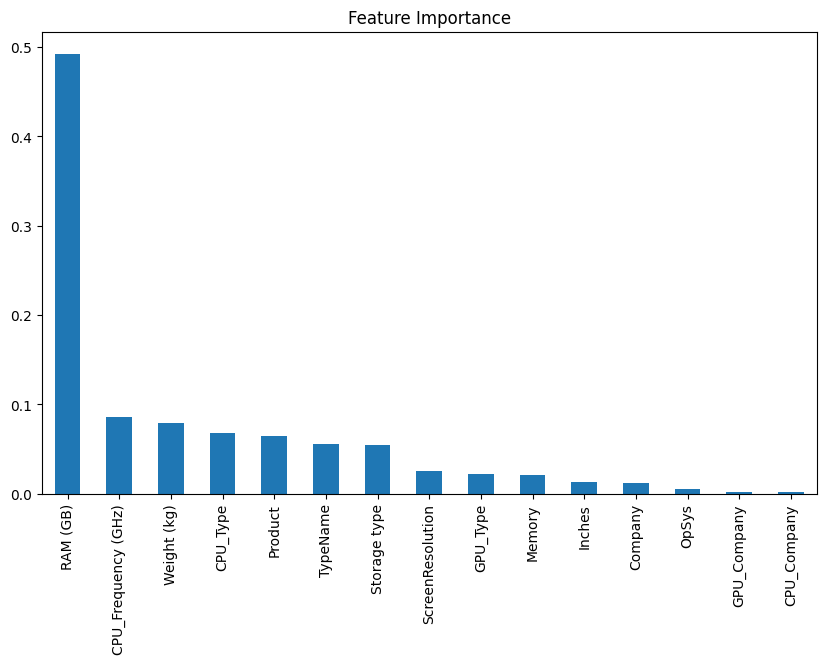

In [123]:
# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()